## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [15]:
import os
import keras
import warnings
warnings.filterwarnings('ignore')

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))



# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation='relu')(input_layer)
    x = keras.layers.Dense(units=256, activation='relu')(x)
    x = keras.layers.Dense(units=128, activation='relu')(x)
    out = keras.layers.Dense(units=10, activation='softmax')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model


In [6]:

model = build_mlp()

model.summary()

"""
Compile 模型
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)




Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________




In [7]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 107us/step - loss: 1.9346 - acc: 0.3023 - val_loss: 1.7386 - val_acc: 0.3688
Epoch 2/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.7108 - acc: 0.3870 - val_loss: 1.6582 - val_acc: 0.4034
Epoch 3/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.6093 - acc: 0.4269 - val_loss: 1.6449 - val_acc: 0.4131
Epoch 4/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.5543 - acc: 0.4454 - val_loss: 1.5368 - val_acc: 0.4542
Epoch 5/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.4932 - acc: 0.4692 - val_loss: 1.5032 - val_acc: 0.4650
Epoch 6/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.4640 - acc: 0.4762 - val_loss: 1.5518 - val_acc: 0.4446
Epoch 7/500
50000/50000 [=

50000/50000 [==============================] - 4s 70us/step - loss: 0.5279 - acc: 0.8112 - val_loss: 2.0329 - val_acc: 0.5101
Epoch 57/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.5316 - acc: 0.8107 - val_loss: 2.0309 - val_acc: 0.5190
Epoch 58/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.5115 - acc: 0.8158 - val_loss: 2.0595 - val_acc: 0.5124
Epoch 59/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.4885 - acc: 0.8258 - val_loss: 2.1265 - val_acc: 0.5159
Epoch 60/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.4949 - acc: 0.8211 - val_loss: 2.1936 - val_acc: 0.5062
Epoch 61/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.5018 - acc: 0.8182 - val_loss: 2.1144 - val_acc: 0.5142
Epoch 62/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.4637 - acc: 0.8349 - val_loss: 2.1604 - val_acc: 0.5239
Epoch 63/500
50000/50000 [==============

Epoch 115/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.1996 - acc: 0.9299 - val_loss: 3.4615 - val_acc: 0.4948
Epoch 116/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1952 - acc: 0.9304 - val_loss: 3.4707 - val_acc: 0.4994
Epoch 117/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.2193 - acc: 0.9216 - val_loss: 3.5102 - val_acc: 0.5048
Epoch 118/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.2414 - acc: 0.9132 - val_loss: 3.4934 - val_acc: 0.4996
Epoch 119/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.2834 - acc: 0.8995 - val_loss: 3.5507 - val_acc: 0.4999
Epoch 120/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1838 - acc: 0.9337 - val_loss: 3.5663 - val_acc: 0.5070
Epoch 121/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.2117 - acc: 0.9246 - val_loss: 3.5425 - val_acc: 0.5045
Epoch 122/500
50000/

50000/50000 [==============================] - 3s 68us/step - loss: 0.1222 - acc: 0.9573 - val_loss: 4.1242 - val_acc: 0.5065
Epoch 174/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.1395 - acc: 0.9512 - val_loss: 4.1469 - val_acc: 0.5045
Epoch 175/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1681 - acc: 0.9414 - val_loss: 4.2129 - val_acc: 0.5013
Epoch 176/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.1406 - acc: 0.9509 - val_loss: 4.2301 - val_acc: 0.5052
Epoch 177/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.2106 - acc: 0.9274 - val_loss: 4.1935 - val_acc: 0.4972
Epoch 178/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1588 - acc: 0.9453 - val_loss: 4.1971 - val_acc: 0.4966
Epoch 179/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1327 - acc: 0.9529 - val_loss: 4.2577 - val_acc: 0.5003
Epoch 180/500
50000/50000 [=======

50000/50000 [==============================] - 3s 68us/step - loss: 0.1456 - acc: 0.9505 - val_loss: 4.5691 - val_acc: 0.4974
Epoch 232/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1596 - acc: 0.9469 - val_loss: 4.4856 - val_acc: 0.5026
Epoch 233/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1200 - acc: 0.9583 - val_loss: 4.5139 - val_acc: 0.5019
Epoch 234/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1767 - acc: 0.9420 - val_loss: 4.5806 - val_acc: 0.4994
Epoch 235/500
50000/50000 [==============================] - 4s 70us/step - loss: 0.0943 - acc: 0.9666 - val_loss: 4.5106 - val_acc: 0.5040
Epoch 236/500
50000/50000 [==============================] - 4s 70us/step - loss: 0.0583 - acc: 0.9797 - val_loss: 4.5483 - val_acc: 0.5034
Epoch 237/500
50000/50000 [==============================] - 3s 70us/step - loss: 0.0827 - acc: 0.9713 - val_loss: 4.5532 - val_acc: 0.5061
Epoch 238/500
50000/50000 [=======

50000/50000 [==============================] - 3s 68us/step - loss: 0.1391 - acc: 0.9546 - val_loss: 4.8343 - val_acc: 0.4972
Epoch 290/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.1221 - acc: 0.9587 - val_loss: 4.8728 - val_acc: 0.5002
Epoch 291/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.0747 - acc: 0.9746 - val_loss: 4.8540 - val_acc: 0.5006
Epoch 292/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.0923 - acc: 0.9690 - val_loss: 4.8093 - val_acc: 0.4995
Epoch 293/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.0752 - acc: 0.9741 - val_loss: 4.8650 - val_acc: 0.4986
Epoch 294/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1081 - acc: 0.9644 - val_loss: 4.8665 - val_acc: 0.5010
Epoch 295/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1116 - acc: 0.9631 - val_loss: 4.8877 - val_acc: 0.5012
Epoch 296/500
50000/50000 [=======

50000/50000 [==============================] - 4s 71us/step - loss: 0.0742 - acc: 0.9755 - val_loss: 5.1150 - val_acc: 0.5016
Epoch 348/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.1982 - acc: 0.9419 - val_loss: 5.1262 - val_acc: 0.4947
Epoch 349/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.1182 - acc: 0.9620 - val_loss: 5.0205 - val_acc: 0.5006
Epoch 350/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.0806 - acc: 0.9729 - val_loss: 5.0194 - val_acc: 0.5065
Epoch 351/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.0322 - acc: 0.9897 - val_loss: 5.0290 - val_acc: 0.5000
Epoch 352/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.0501 - acc: 0.9828 - val_loss: 5.0810 - val_acc: 0.5024
Epoch 353/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.0666 - acc: 0.9777 - val_loss: 5.1389 - val_acc: 0.4989
Epoch 354/500
50000/50000 [=======

50000/50000 [==============================] - 3s 67us/step - loss: 0.0432 - acc: 0.9859 - val_loss: 5.0899 - val_acc: 0.5035
Epoch 406/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.0539 - acc: 0.9817 - val_loss: 5.1566 - val_acc: 0.4994
Epoch 407/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.0822 - acc: 0.9727 - val_loss: 5.1200 - val_acc: 0.4938
Epoch 408/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1615 - acc: 0.9521 - val_loss: 5.1082 - val_acc: 0.5041
Epoch 409/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.0784 - acc: 0.9737 - val_loss: 5.1161 - val_acc: 0.5003
Epoch 410/500
50000/50000 [==============================] - 3s 70us/step - loss: 0.0472 - acc: 0.9844 - val_loss: 5.1526 - val_acc: 0.5035
Epoch 411/500
50000/50000 [==============================] - 4s 70us/step - loss: 0.0576 - acc: 0.9812 - val_loss: 5.1485 - val_acc: 0.5013
Epoch 412/500
50000/50000 [=======

50000/50000 [==============================] - 3s 67us/step - loss: 0.0638 - acc: 0.9793 - val_loss: 5.2720 - val_acc: 0.5025
Epoch 464/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.0242 - acc: 0.9923 - val_loss: 5.2857 - val_acc: 0.5021
Epoch 465/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.0661 - acc: 0.9781 - val_loss: 5.2282 - val_acc: 0.5023
Epoch 466/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.0878 - acc: 0.9725 - val_loss: 5.3030 - val_acc: 0.4982
Epoch 467/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.1357 - acc: 0.9597 - val_loss: 5.3744 - val_acc: 0.4933
Epoch 468/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.1274 - acc: 0.9626 - val_loss: 5.2318 - val_acc: 0.4996
Epoch 469/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.0296 - acc: 0.9908 - val_loss: 5.2525 - val_acc: 0.5060
Epoch 470/500
50000/50000 [=======

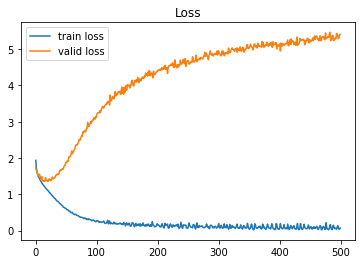

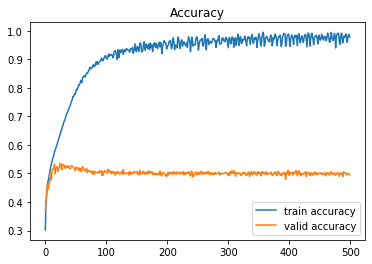

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [10]:
score = model.evaluate(x_test, y_test)

print('loss score', score[0])
print('acc score', score[1])

10000/10000 [==============================] - 1s 108us/step
loss score 5.406555952453613
acc score 0.4951


In [11]:
import os
import keras
import warnings
warnings.filterwarnings('ignore')

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [12]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [13]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))



# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [14]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation='relu')(input_layer)
    x = keras.layers.Dense(units=256, activation='relu')(x)
    x = keras.layers.Dense(units=128, activation='relu')(x)
    out = keras.layers.Dense(units=10, activation='softmax')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model


In [17]:

model = build_mlp()

model.summary()

"""
Compile 模型
"""

sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=sgd)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.8772 - acc: 0.3292 - val_loss: 1.7680 - val_acc: 0.3648
Epoch 2/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.6562 - acc: 0.4123 - val_loss: 1.7306 - val_acc: 0.3694
Epoch 3/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.5617 - acc: 0.4483 - val_loss: 1.5894 - val_acc: 0.4343
Epoch 4/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.5013 - acc: 0.4681 - val_loss: 1.4879 - val_acc: 0.4709
Epoch 5/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.4471 - acc: 0.4866 - val_loss: 1.5326 - val_acc: 0.4560
Epoch 6/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.4080 - acc: 0.5006 - val_loss: 1.5087 - val_acc: 0.4673
Epoch 7/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.3675 - acc: 0.5146 - val_loss: 1.4967 - 

50000/50000 [==============================] - 3s 59us/step - loss: 0.2979 - acc: 0.8970 - val_loss: 2.2824 - val_acc: 0.5102
Epoch 60/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.2965 - acc: 0.8946 - val_loss: 2.2400 - val_acc: 0.5339
Epoch 61/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.2856 - acc: 0.8986 - val_loss: 2.5121 - val_acc: 0.4994
Epoch 62/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.2746 - acc: 0.9048 - val_loss: 2.4119 - val_acc: 0.5208
Epoch 63/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.2804 - acc: 0.9009 - val_loss: 2.4526 - val_acc: 0.5222
Epoch 64/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.2619 - acc: 0.9064 - val_loss: 2.3332 - val_acc: 0.5308
Epoch 65/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.2612 - acc: 0.9076 - val_loss: 2.3652 - val_acc: 0.5352
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.0853 - acc: 0.9709 - val_loss: 3.4832 - val_acc: 0.5361
Epoch 119/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.0764 - acc: 0.9732 - val_loss: 3.6127 - val_acc: 0.5390
Epoch 120/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.0978 - acc: 0.9659 - val_loss: 3.6202 - val_acc: 0.5366
Epoch 121/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.0815 - acc: 0.9713 - val_loss: 3.5895 - val_acc: 0.5382
Epoch 122/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.0607 - acc: 0.9786 - val_loss: 3.6266 - val_acc: 0.5345
Epoch 123/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.0703 - acc: 0.9753 - val_loss: 3.6219 - val_acc: 0.5259
Epoch 124/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.0744 - acc: 0.9740 - val_loss: 3.6311 - val_acc: 0.5439
Epoch 125/500
50000/

50000/50000 [==============================] - 3s 58us/step - loss: 0.0921 - acc: 0.9691 - val_loss: 4.0849 - val_acc: 0.5226
Epoch 177/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.0786 - acc: 0.9746 - val_loss: 4.0278 - val_acc: 0.5316
Epoch 178/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.0630 - acc: 0.9777 - val_loss: 4.0104 - val_acc: 0.5355
Epoch 179/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.0544 - acc: 0.9808 - val_loss: 4.0365 - val_acc: 0.5349
Epoch 180/500
50000/50000 [==============================] - 3s 61us/step - loss: 0.0621 - acc: 0.9785 - val_loss: 4.0503 - val_acc: 0.5381
Epoch 181/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.0489 - acc: 0.9829 - val_loss: 4.0302 - val_acc: 0.5464
Epoch 182/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.0385 - acc: 0.9866 - val_loss: 4.0617 - val_acc: 0.5415
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 3s 59us/step - loss: 1.6642e-04 - acc: 1.0000 - val_loss: 4.1597 - val_acc: 0.5587
Epoch 234/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.6376e-04 - acc: 1.0000 - val_loss: 4.1645 - val_acc: 0.5588
Epoch 235/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.6268e-04 - acc: 1.0000 - val_loss: 4.1645 - val_acc: 0.5588
Epoch 236/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.5961e-04 - acc: 1.0000 - val_loss: 4.1650 - val_acc: 0.5592
Epoch 237/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.5799e-04 - acc: 1.0000 - val_loss: 4.1677 - val_acc: 0.5592
Epoch 238/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.5556e-04 - acc: 1.0000 - val_loss: 4.1693 - val_acc: 0.5598
Epoch 239/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.5440e-04 - acc: 1.0000 - val_loss: 4.1687 - val_acc: 0.5601
Epoch 

Epoch 290/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.0208e-04 - acc: 1.0000 - val_loss: 4.2243 - val_acc: 0.5607
Epoch 291/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.0127e-04 - acc: 1.0000 - val_loss: 4.2249 - val_acc: 0.5610
Epoch 292/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.0105e-04 - acc: 1.0000 - val_loss: 4.2261 - val_acc: 0.5605
Epoch 293/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.0039e-04 - acc: 1.0000 - val_loss: 4.2265 - val_acc: 0.5606
Epoch 294/500
50000/50000 [==============================] - 3s 60us/step - loss: 9.9552e-05 - acc: 1.0000 - val_loss: 4.2276 - val_acc: 0.5607
Epoch 295/500
50000/50000 [==============================] - 3s 59us/step - loss: 9.9103e-05 - acc: 1.0000 - val_loss: 4.2285 - val_acc: 0.5608
Epoch 296/500
50000/50000 [==============================] - 3s 59us/step - loss: 9.8823e-05 - acc: 1.0000 - val_loss: 4.2298 - val_acc:

Epoch 347/500
50000/50000 [==============================] - 3s 58us/step - loss: 7.6468e-05 - acc: 1.0000 - val_loss: 4.2643 - val_acc: 0.5606
Epoch 348/500
50000/50000 [==============================] - 3s 59us/step - loss: 7.6526e-05 - acc: 1.0000 - val_loss: 4.2646 - val_acc: 0.5607
Epoch 349/500
50000/50000 [==============================] - 3s 59us/step - loss: 7.5943e-05 - acc: 1.0000 - val_loss: 4.2657 - val_acc: 0.5609
Epoch 350/500
50000/50000 [==============================] - 3s 59us/step - loss: 7.5687e-05 - acc: 1.0000 - val_loss: 4.2652 - val_acc: 0.5608
Epoch 351/500
50000/50000 [==============================] - 3s 60us/step - loss: 7.5522e-05 - acc: 1.0000 - val_loss: 4.2663 - val_acc: 0.5606
Epoch 352/500
50000/50000 [==============================] - 3s 59us/step - loss: 7.4955e-05 - acc: 1.0000 - val_loss: 4.2672 - val_acc: 0.5615
Epoch 353/500
50000/50000 [==============================] - 3s 59us/step - loss: 7.5011e-05 - acc: 1.0000 - val_loss: 4.2681 - val_acc:

Epoch 404/500
50000/50000 [==============================] - 3s 60us/step - loss: 6.2058e-05 - acc: 1.0000 - val_loss: 4.2943 - val_acc: 0.5612
Epoch 405/500
50000/50000 [==============================] - 3s 60us/step - loss: 6.2203e-05 - acc: 1.0000 - val_loss: 4.2943 - val_acc: 0.5618
Epoch 406/500
50000/50000 [==============================] - 3s 59us/step - loss: 6.1679e-05 - acc: 1.0000 - val_loss: 4.2949 - val_acc: 0.5617
Epoch 407/500
50000/50000 [==============================] - 3s 59us/step - loss: 6.1350e-05 - acc: 1.0000 - val_loss: 4.2953 - val_acc: 0.5617
Epoch 408/500
50000/50000 [==============================] - 3s 59us/step - loss: 6.1374e-05 - acc: 1.0000 - val_loss: 4.2955 - val_acc: 0.5613
Epoch 409/500
50000/50000 [==============================] - 3s 59us/step - loss: 6.0966e-05 - acc: 1.0000 - val_loss: 4.2961 - val_acc: 0.5615
Epoch 410/500
50000/50000 [==============================] - 3s 61us/step - loss: 6.0977e-05 - acc: 1.0000 - val_loss: 4.2968 - val_acc:

Epoch 461/500
50000/50000 [==============================] - 3s 59us/step - loss: 5.2403e-05 - acc: 1.0000 - val_loss: 4.3179 - val_acc: 0.5613
Epoch 462/500
50000/50000 [==============================] - 3s 59us/step - loss: 5.2372e-05 - acc: 1.0000 - val_loss: 4.3186 - val_acc: 0.5615
Epoch 463/500
50000/50000 [==============================] - 3s 58us/step - loss: 5.2202e-05 - acc: 1.0000 - val_loss: 4.3188 - val_acc: 0.5610
Epoch 464/500
50000/50000 [==============================] - 3s 60us/step - loss: 5.2115e-05 - acc: 1.0000 - val_loss: 4.3197 - val_acc: 0.5613
Epoch 465/500
50000/50000 [==============================] - 3s 59us/step - loss: 5.1841e-05 - acc: 1.0000 - val_loss: 4.3196 - val_acc: 0.5610
Epoch 466/500
50000/50000 [==============================] - 3s 59us/step - loss: 5.1821e-05 - acc: 1.0000 - val_loss: 4.3201 - val_acc: 0.5618
Epoch 467/500
50000/50000 [==============================] - 3s 59us/step - loss: 5.1591e-05 - acc: 1.0000 - val_loss: 4.3201 - val_acc:

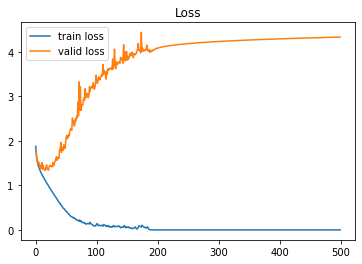

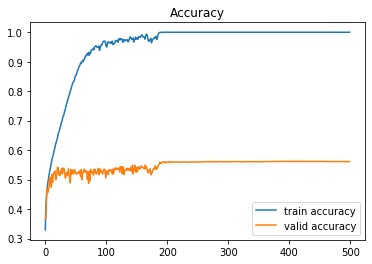

In [19]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()